In [220]:
import sys
sys.path.append("../../function/")
import trajDiff_v140 as trajdiff
milo2=trajdiff.Milo2()
import matplotlib.pyplot as plt
import PyComplexHeatmap as pch

In [6]:
adata=sc.read("../../important_processed_data/11.16_dpt.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

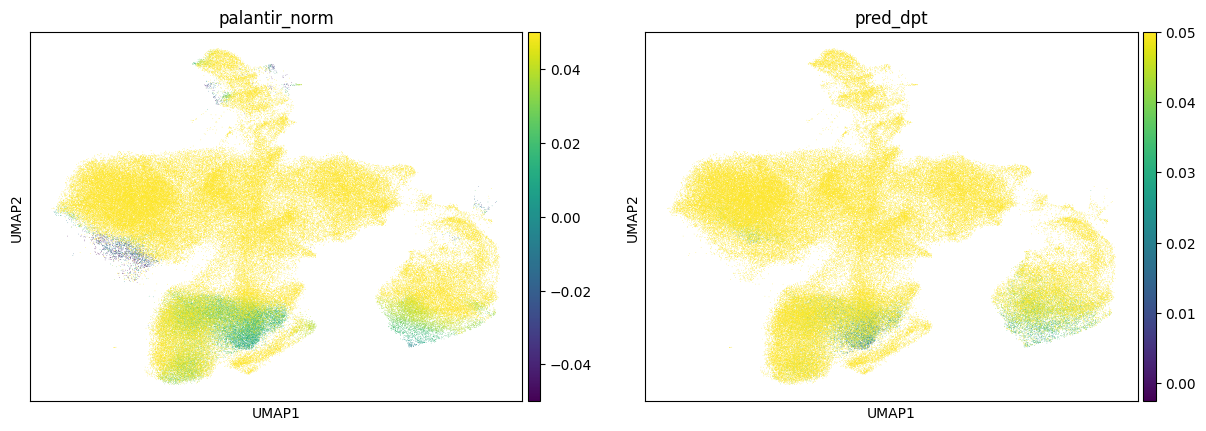

In [68]:
sc.pl.umap(adata,color=["palantir_norm","pred_dpt"],vmax=0.05)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


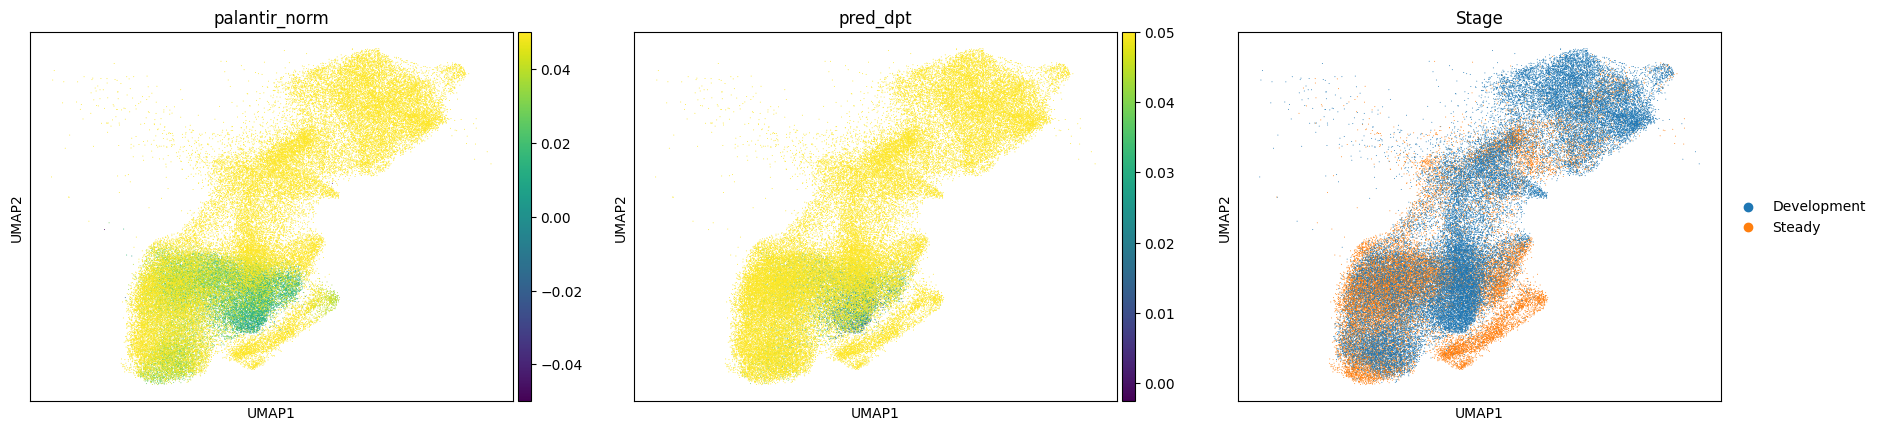

In [69]:
sc.pl.umap(lepr,color=["palantir_norm","pred_dpt","Stage"],vmax=0.05)

In [8]:
lepr=adata[adata.obs["lineage_lepr"]]

In [12]:
lepr=lepr[lepr.obs["Stage"]!="Injury(Regeneration)"]

In [22]:
lepr.obs["Age"]

Unnamed: 0
Ablation_Matsushita_abl7con1_AAACCTGCAAAGGCGT-1_2-0-2        Adult
Ablation_Matsushita_abl7con1_AAACGGGGTGTTCGAT-1_2-0-2        Adult
Ablation_Matsushita_abl7con1_AAACGGGTCGCCTGTT-1_2-0-2        Adult
Ablation_Matsushita_abl7con1_AAAGATGCAATGTAAG-1_2-0-2        Adult
Ablation_Matsushita_abl7con1_AAAGATGGTCGATTGT-1_2-0-2        Adult
                                                           ...    
TTTCGATTCCTCTAAT-1_5-1-2                                 Postnatal
TTTCGATTCTGGTGCG-1_5-1-2                                 Postnatal
TTTGACTGTATTTCCT-1_5-1-2                                 Postnatal
TTTGGAGCAGCGACAA-1_5-1-2                                 Postnatal
TTTGGTTCACTACTTT-1_5-1-2                                 Postnatal
Name: Age, Length: 65217, dtype: category
Categories (4, object): ['Adult', 'Old', 'Postnatal', 'Young Adult']

In [23]:
np.sum((lepr.obs["Stage"]=="Steady") & (lepr.obs["Age"]=="Young Adult"))

6233

In [25]:
lepr.obs["Stage"][(lepr.obs["Stage"]=="Steady") & (lepr.obs["Age"]=="Young Adult")]="Development"

In [26]:
milo2=Milo2()

In [27]:
mdata=milo2.load(lepr)

In [41]:
mdata2=milo2.load(lepr)

In [43]:
mdata2.mod["milo"]=mdata["milo"]

In [29]:
sc.pp.neighbors(mdata['rna'], use_rep='X_scANVI', n_neighbors=150, n_pcs=15)


2024-01-21 18:39:27.973618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 18:39:29.121467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NameError: name 'milo' is not defined

In [30]:
milo2.make_nhoods(mdata['rna'], prop=0.1)
mdata = milo2.count_nhoods(mdata, sample_col="Sample")

In [1]:
milo2.make_null(mdata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=20)

NameError: name 'milo2' is not defined

In [36]:
milo2.da_nhoods(mdata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')

In [44]:
milo2.make_range(mdata2,time_col="pred_dpt")

In [45]:
lenDf=milo2.permute_test_point(mdata2,n=100,include_null=True)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/script/../../function/trajDiff_v133.py:737: RuntimeWarning: invalid value encountered in double_scalars
  permute_null[i]=np.sum(null_true_list)/len(null_false_list)


In [46]:
lenDf=milo2.test_binom(lenDf)

In [62]:
lenDf.to_csv("../result/24.1.20_trajdiff_dotplot/24.1.21_progress_lendf.csv")

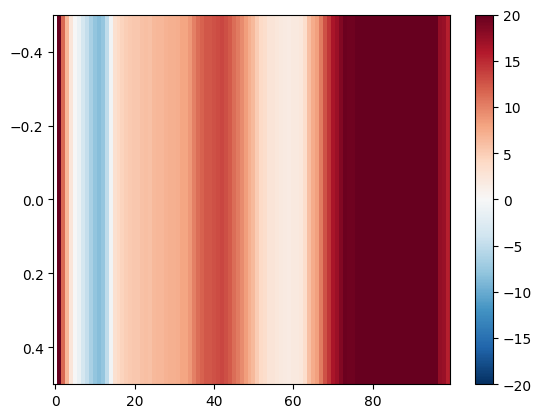

In [52]:
y_values = pd.DataFrame(lenDf['meanLogChange']).T
plt.imshow(y_values, cmap='RdBu_r', interpolation='nearest',vmax=20,vmin=-20, aspect='auto')

# Add colorbar
plt.colorbar()
plt.savefig("../result/24.1.20_trajdiff_dotplot/logExpressionHM.pdf")

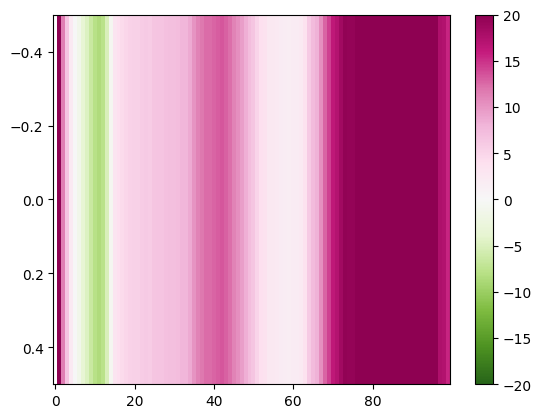

In [55]:
y_values = pd.DataFrame(lenDf['meanLogChange']).T
plt.imshow(y_values, cmap='PiYG_r', interpolation='nearest',vmax=20,vmin=-20, aspect='auto')

# Add colorbar
plt.colorbar()
plt.savefig("../result/24.1.20_trajdiff_dotplot/logExpressionHM.pdf")

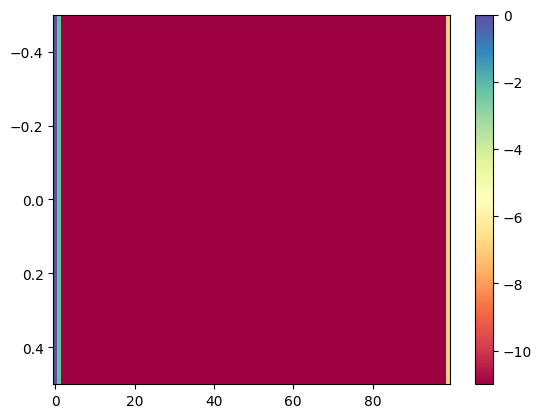

In [61]:
y_values = pd.DataFrame(lenDf['binom_p']).T
y_values=np.log10(y_values+0.00000000001)
plt.imshow(y_values, cmap='Spectral', interpolation='nearest',aspect='auto')

# Add colorbar
plt.colorbar()
plt.savefig("../result/24.1.20_trajdiff_dotplot/logPHM.pdf")

In [75]:
milo=mdata["milo"]

In [79]:
count_mat = milo.X.T.toarray()

In [80]:
count_mat

array([[69., 38.,  8., ...,  0.,  0., 10.],
       [47.,  8.,  0., ...,  1.,  0.,  1.],
       [87.,  7.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2., 32.],
       [ 0.,  1.,  0., ...,  5.,  4., 29.],
       [ 0.,  0.,  0., ..., 20.,  6., 30.]], dtype=float32)

In [103]:
cpmTest=milo2.make_da_cpm(mdata)

In [100]:
del milo.varm["whole_cpm"]

In [98]:
milo.varm["whole_cpm"]=cpmTest

In [107]:
whole_cpm=milo.varm["whole_cpm"]
colName = whole_cpm.columns
var_names = milo.var_names

In [108]:
varTable=milo.var
range_data=varTable[["range_down","range_up"]].values


In [111]:
mask = (0.5 >= range_data[:, 0]) & (0.5 <= range_data[:, 1])
group1Array=whole_cpm.loc[mask,:]

In [113]:
group1Mean=np.mean(group1Array,axis=0)

In [116]:
n=100
permute_point_group={}
for j in range(n):
    point=(j+1)/(n+1)
    mask = (point >= range_data[:, 0]) & (point <= range_data[:, 1])
    group1Array=whole_cpm.loc[mask,:]
    group1Mean=np.mean(group1Array,axis=0)
    permute_point_group[j]=group1Mean
groupDf=pd.DataFrame(permute_point_group)
groupDf.columns=groupDf.columns.astype("str")


In [121]:
groupDf=groupDf.fillna(0)

In [137]:
np.array(groupDf.sum(axis=0)>0)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [144]:
groupDf=groupDf.T[np.array(groupDf.sum(axis=0)>0)].T

In [150]:
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df = groupDf.apply(row_scale, axis=1)

In [159]:
coorDf=pd.read_csv("../processed_data/24.1.20_trajdiff_dotplot/24.1.20_coorSelect.csv",index_col=0)

In [179]:
meta=lepr.obs
sampleDf2=meta[["Sample","Project","Age"]][meta["Sample"].isin(coorDf.columns)].drop_duplicates()

In [180]:
sampleDf2['Age'] = sampleDf2['Age'].astype("str")
sampleDf2["Age"][~sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Adult"

sampleDf2["Age"][sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Young"

/tmp/ipykernel_4026297/3036132886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampleDf2["Age"][~sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Adult"
/tmp/ipykernel_4026297/3036132886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampleDf2["Age"][sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Young"


In [195]:
sampleDf2['Project'] = sampleDf2['Project'].astype("str")

In [163]:
scaled_df=scaled_df.loc[coorDf.columns]

In [181]:
sampleDf2.index=sampleDf2['Sample']

In [212]:
row_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleDf2.Age,cmap='Set1',
                                           add_text=True,text_kws={'color':'white','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=False),
                               Project=pch.anno_simple(sampleDf2.Project,cmap='Set3',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           axis=0,verbose=0,label_kws={'rotation':90,'horizontalalignment':'left'})

In [210]:
pseudotimeCol=scaled_df.columns.astype("int")
pseudotimeDf=pd.DataFrame(pseudotimeCol)
pseudotimeDf.index=scaled_df.columns
col_ha = pch.HeatmapAnnotation(Pseudotime=pch.anno_simple(pseudotimeDf[0],cmap='jet',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Plotting legends..
Estimated legend width: 64.9125 mm


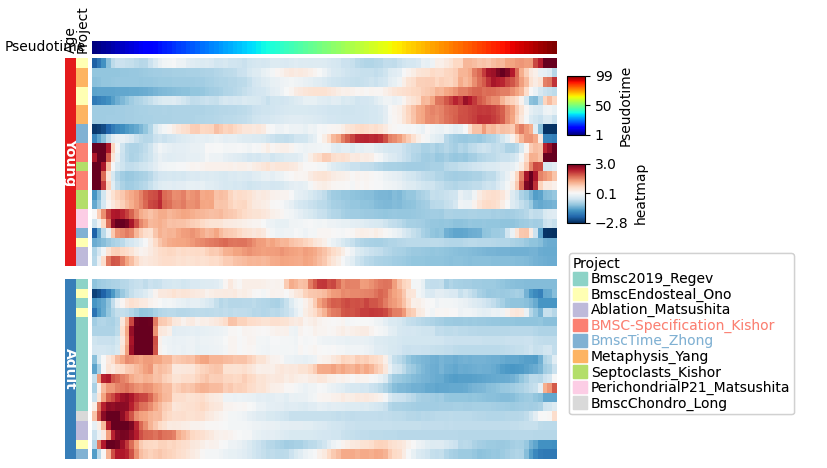

In [215]:
pch.ClusterMapPlotter(scaled_df,col_cluster=False,cmap="RdBu_r",vmax=3,
                      row_split=sampleDf2.Age,left_annotation=row_ha,
                      top_annotation=col_ha,row_split_gap=3,row_split_order=["Young","Adult"]
                         )

In [221]:
groupCpmTest=milo2.da_nhoods(mdata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')

In [230]:
n=100
permute_point_group={}
for j in range(n):
    point=(j+1)/(n+1)
    mask = (point >= range_data[:, 0]) & (point <= range_data[:, 1])
    group1Array=groupCpmTest.loc[mask,:]
    group1Mean=np.mean(group1Array,axis=0)
    permute_point_group[j]=group1Mean
groupCpmDf=pd.DataFrame(permute_point_group)
groupCpmDf.columns=groupCpmDf.columns.astype("str")


In [235]:
groupCpmDf=groupCpmDf.T[np.array(groupCpmDf.sum(axis=0)>0)].T
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df_group = groupCpmDf.apply(row_scale, axis=1)

In [236]:
scaled_df_group

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
StageDevelopment,-0.063652,-0.521232,-0.692757,-0.827364,-0.962181,-0.985266,-1.127384,-1.203654,-1.292450,-1.392659,...,1.726431,1.50817,1.385843,1.217133,0.931571,0.213670,-0.507188,-0.562539,-0.473977,-0.586730
StageSteady,-1.258931,-0.375395,0.229867,0.833734,1.173981,1.434992,1.838107,2.096461,2.457915,2.750450,...,-1.131315,-1.09372,-1.093800,-1.195289,-1.322672,-1.424355,-1.466295,-1.207486,-1.168008,-1.070029


In [244]:
fdr=pd.DataFrame(lenDf['binom_p'])
fdr=-np.log10(fdr+0.00000000001)
diff=pd.DataFrame(lenDf['meanLogChange']).T

In [258]:
np.array(~diff.isna())

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [273]:
diff=diff.dropna(axis=1)

In [276]:
diff=diff.T

In [284]:
scaled_df_group.T.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99'],
      dtype='object')

In [286]:
diff.index=diff.index.astype("str")
fdr.index=fdr.index.astype("str")

In [288]:
fdr

,binom_p
0,-4.342945e-12
1,2.202326e+00
2,1.100000e+01
3,1.100000e+01
4,1.100000e+01
...,...
95,1.100000e+01
96,1.100000e+01
97,1.100000e+01
98,1.100000e+01


In [4]:
bottonCol=pd.concat([scaled_df_group.T,diff,fdr],axis=1).dropna()

NameError: name 'pd' is not defined

In [290]:
bottonCol

,StageDevelopment,StageSteady,meanLogChange,binom_p
1,-0.063652,-1.258931,20.652902,2.202326
2,-0.521232,-0.375395,11.485977,11.000000
3,-0.692757,0.229867,6.608045,11.000000
4,-0.827364,0.833734,2.440388,11.000000
5,-0.962181,1.173981,-0.022597,11.000000
...,...,...,...,...
95,0.213670,-1.424355,24.121325,11.000000
96,-0.507188,-1.466295,23.011347,11.000000
97,-0.562539,-1.207486,17.598324,11.000000
98,-0.473977,-1.168008,17.288264,11.000000


In [295]:

bottom_ha = pch.HeatmapAnnotation(Young=pch.anno_simple(bottonCol.StageDevelopment,cmap='RdBu_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Adult=pch.anno_simple(bottonCol.StageSteady,cmap='RdBu_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               Diff_expression=pch.anno_simple(bottonCol.meanLogChange,cmap='PiYG_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                               FDR=pch.anno_simple(bottonCol.binom_p,cmap='Spectral_r',
                                           add_text=False,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Plotting legends..
Estimated legend width: 64.9125 mm


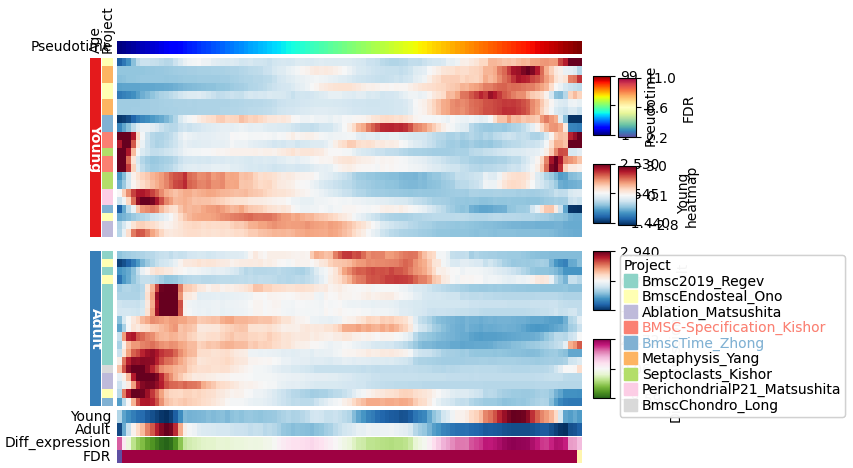

In [297]:
pch.ClusterMapPlotter(scaled_df,col_cluster=False,cmap="RdBu_r",vmax=3,
                      row_split=sampleDf2.Age,left_annotation=row_ha,
                      top_annotation=col_ha,row_split_gap=3,row_split_order=["Young","Adult"],
                      bottom_annotation=bottom_ha
                         )
plt.savefig("../result/24.2.2_fig4_replot/da_heatmap.pdf")

In [228]:
groupCpmTest.iloc[:,0]

index_cell
Ablation_Matsushita_abl7con1_AAAGATGCAATGTAAG-1_2-0-2    198.321634
Ablation_Matsushita_abl7con1_ACAGCTACAGATCCAT-1_2-0-2    178.837812
Ablation_Matsushita_abl7con1_ACCAGTAAGACCACGA-1_2-0-2    464.166495
Ablation_Matsushita_abl7con1_ACGATACGTGCACTTA-1_2-0-2    185.626738
Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2    287.693481
                                                            ...    
TCATGGATCACAAGAA-1_5-1-2                                 501.161244
TCGTGCTCAAGAAATC-1_5-1-2                                 554.849639
TGAGGAGTCTTGGAAC-1_5-1-2                                 604.038966
TTCCGGTAGTAGCCAG-1_5-1-2                                 509.559377
TTCGATTAGATACTGA-1_5-1-2                                 867.435111
Name: StageDevelopment, Length: 4324, dtype: float64

In [218]:
milo

AnnData object with n_obs × n_vars = 46 × 4324
    obs: 'Stage', 'Sample'
    var: 'index_cell', 'kth_distance', 'null', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'time', 'range_down', 'range_up', 'Accept', 'logChange'
    uns: 'sample_col'
    varm: 'whole_cpm'